In [21]:
import os
import cv2 as cv
import tensorflow as tf
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt

width = 640
height = 480

# create a basic naming root for any files that we create and want to save during this session
time_str = datetime.now().strftime("%Y_%m_%d_%H_")
output_name = os.getcwd() + "/output_images/" + time_str
img_num = 0
print(output_name)

# list all possible devices that the camera might be
# create a video capture device
vid_cap = cv.VideoCapture(0)
fourcc = cv.VideoWriter_fourcc(*'MJPG')
vid_out = cv.VideoWriter('webcam_out_{}.mp4'.format(img_num), fourcc, 20.0, (width, height))
if not vid_cap.isOpened():
    print("ERROR opening video capture object")

def readCamera():
    # function to capture images from webcam and present them using imshow
    ret, frame = vid_cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        return None
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    return gray

def displayImage(img):
    # Display the resulting frame
    cv.imshow('frame', img)
    # if cv.waitKey(1) == ord('q'):
    # # break

def save_images(images):
    global img_num
    for i in range(len(images)):
        tf.keras.utils.save_img(output_name + str(img_num) + ".png", images[i])
        img_num = img_num + 1

def save_image(image):
    global img_num
    cv.imwrite(output_name + str(img_num) + ".png", image)
    img_num = img_num + 1

def plot_images(images):
    print("images length: ", len(images))
    if len(images) > 1:
        nrows, hop_size = adjustGrid(len(images))
        plt.figure(figsize=(hop_size*10, nrows*10))
        plt.margins(0.0)
        # for each lines of the plo%
        print("plotting {} total images with {} columns in {} rows".format(len(images), hop_size, nrows))
        for i in range(len(images)):
            ax = plt.subplot(nrows, hop_size, i+1)
            plt.imshow(images[i])
            plt.axis("off")
            plt.savefig(output_name + str(img_num) + "_figure.png")
    else:
      plot_image(image)

def plot_image(image):
    plt.figure(figsize=(20, 20))
    plt.margins(0.0)
    plt.imshow(image)
    plt.axis("off")
    plt.savefig(output_name + str(img_num) + "_figure.png")

    # simple function to display image
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

/Users/nathan/workspace/neural_art_bots/output_images/2023_02_20_11_


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


(720, 1280)


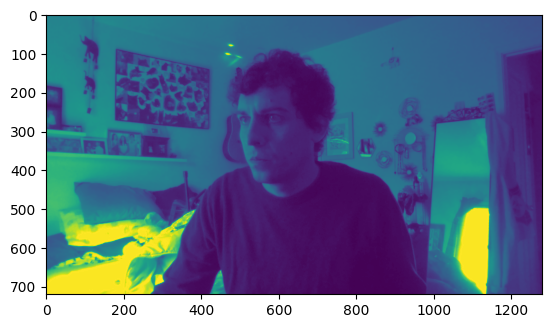

In [22]:
image = readCamera()
print(image.shape)
imshow(image)
save_image(image)

KeyboardInterrupt: 

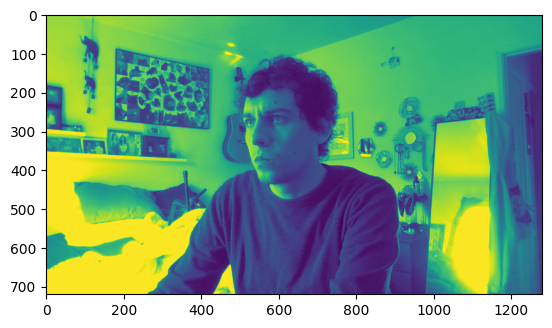

In [23]:
itters = 0
while True:
    image = readCamera()
    displayImage(image)
    if itters % 100 == 0:
        save_image(image)
    # stop program if 'q' key is pressed
    if cv.waitKey(1) == ord('q'):
        break
    itters = itters + 1

vid_cap.release()
vid_out.release()
cv.destroyAllWindows()
# activate and turn on the webcam

# capture image from webcam

# use image as source for neural style transfer or deep dream

# display and save the updated image